In [1]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

image_data = nib.load('../images/FLAIR.nii.gz')
image = image_data.get_fdata()

In [13]:
def threshold(image, tau, tol):
    while True:
        binary_image = image >= tau

        mBG = np.mean(image[binary_image == False])
        mFG = np.mean(image[binary_image == True])

        new_tau = 0.5 * (mBG + mFG)

        if abs(tau - new_tau) < tol:
            break

        tau = new_tau

    return binary_image

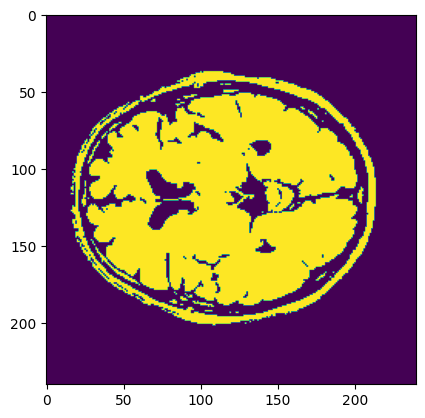

In [14]:
segmentation = threshold(image, 127, 1)
plt.imshow(segmentation[:,:,20])

(array([1.784856e+06, 6.111900e+04, 5.316600e+04, 5.543200e+04,
        5.392300e+04, 5.228700e+04, 5.111500e+04, 5.395300e+04,
        7.863400e+04, 1.139870e+05, 1.201600e+05, 8.755100e+04,
        5.073500e+04, 2.581100e+04, 1.472500e+04, 1.059700e+04,
        9.050000e+03, 8.225000e+03, 7.478000e+03, 7.132000e+03,
        6.713000e+03, 6.469000e+03, 6.464000e+03, 6.297000e+03,
        6.026000e+03, 5.339000e+03, 4.911000e+03, 4.357000e+03,
        3.800000e+03, 3.304000e+03, 2.824000e+03, 2.388000e+03,
        1.904000e+03, 1.401000e+03, 9.750000e+02, 6.870000e+02,
        4.350000e+02, 2.470000e+02, 1.190000e+02, 9.500000e+01,
        4.700000e+01, 2.100000e+01, 1.800000e+01, 1.200000e+01,
        4.000000e+00, 4.000000e+00, 2.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([  0.        ,  14.83355225,  29.66710449,  44.50065674,
         59.33420898,  74.16776123,  89.00131348, 103.83486572,
        118.66841797, 133.50197021, 148.33552246, 163.16907471,
  

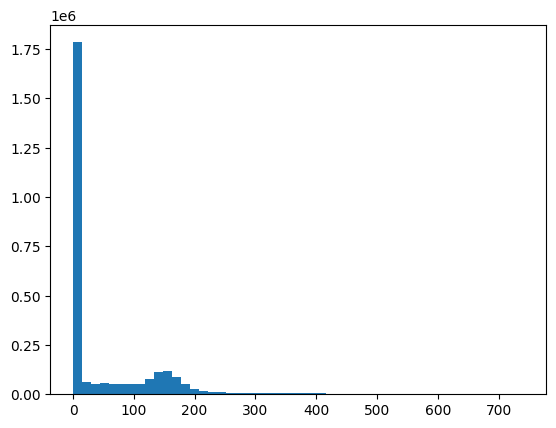

In [15]:
plt.hist(image.flatten(), 50)